In [4]:
#Import base libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Origin: 

This dataset [UCI](https://archive.ics.uci.edu/ml/datasets/Housing) was taken from the StatLib library which is maintained at Carnegie Mellon University. 

### Creator: 

Harrison, D. and Rubinfeld, D.L. 
'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.


### Data Set Information:

Concerns housing values in suburbs of Boston.


### Attribute Information:

*  CRIM: per capita crime rate by town 
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
* INDUS: proportion of non-retail business acres per town 
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
* NOX: nitric oxides concentration (parts per 10 million) 
* RM: average number of rooms per dwelling 
* AGE: proportion of owner-occupied units built prior to 1940 
* DIS: weighted distances to five Boston employment centres 
* RAD: index of accessibility to radial highways 
* TAX: full-value property-tax rate per \$10,000 
* PTRATIO: pupil-teacher ratio by town 
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
* LSTAT: \% lower status of the population 
* MEDV: Median value of owner-occupied homes in $1000's

### Goal
The goal is to predict the median value of homes based on the other attributes


## Obtaining data

In [21]:
import urllib
urllib.urlretrieve('https://raw.githubusercontent.com/sharatsc/cdse/master/boston-housing/boston.csv', 'boston.csv')

('boston.csv', <httplib.HTTPMessage instance at 0x10d22b5f0>)

#### Read the data using pandas

In [22]:
df = pd.read_csv('boston.csv')

#### Get summary data about the data frame

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Scrub data

In [30]:
df = df.fillna(0)

## Explore data

In [31]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Model data

In [39]:
from statsmodels import regression
from statsmodels.formula import api as smf

In [49]:
formula = 'medv~' + ' + '.join(df.columns - ['medv'])
print formula

medv~age + black + chas + crim + dis + indus + lstat + nox + ptratio + rad + rm + tax + zn


In [51]:
model = smf.ols(formula=formula, data=df)
res=model.fit()


## Interpret model

In [52]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 09 Apr 2017   Prob (F-statistic):          6.72e-135
Time:                        11:48:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000        26.432    46.487
age            0.0007      0.013      0.052      0.958        -0.025     0.027
black          0.0093      0.003      3.467      0.001         0.004     0.015
chas           2.6867      0.862      3.118      0.002         0.994     4.380
crim          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
dis           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
indus          0.0206      0.061      0.334      0.738        -0.100     0.141
lstat         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
nox          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
ptratio       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
rad            0.3060      0.066      4.613      0.000         0.176     0.436
rm             3.8099      0.418      9.116      0.000         2.989     4.631
tax           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
zn             0.0464      0.014      3.382      0.001         0.019     0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

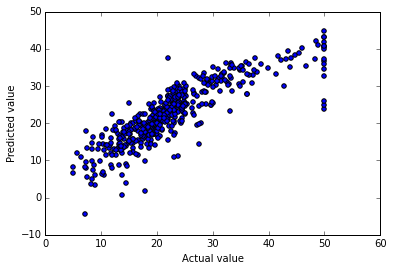

In [56]:
plt.scatter(df['medv'], res.fittedvalues)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')